In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
N = 100 
x = np.random.normal(size=N)
y = 0.5*x + 0.2*(np.random.normal(size=N))

In [3]:
fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', 
                marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y",
    yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

In [4]:
print("Variance in x =",np.var(x))
print("Variance in y =",np.var(y))

Variance in x = 1.0547106624157712
Variance in y = 0.28861621925362413


In [5]:
def covariance(a,b):
    return ((a - a.mean())*(b - b.mean())).sum() / (len(a)-1)

In [6]:
print("Covariance of x & y =",covariance(x,y))
print("Covariance of y & x =",covariance(x,y))
print("Covariance of x with itself =",covariance(x,x),", variance of x =",np.var(x))
print("Covariance of y with itself =",covariance(y,y),", variance of x =",np.var(y))

Covariance of x & y = 0.5225486730246807
Covariance of y & x = 0.5225486730246807
Covariance of x with itself = 1.065364305470476 , variance of x = 1.0547106624157712
Covariance of y with itself = 0.2915315345996203 , variance of x = 0.28861621925362413


In [9]:
data = np.stack((x,y), axis=1) # pack the x & y data together in one 2D array
print("data.shape =",data.shape)

cov = np.cov(data.T) # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix = \n",cov)


data.shape = (100, 2)
covariance matrix = 
 [[1.06536431 0.52254867]
 [0.52254867 0.29153153]]


In [10]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z)).T
print("data.shape =",data.shape)
cov = np.cov(data.T)
print("covariance matrix =\n",cov)

# Plot our data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

data.shape = (100, 3)
covariance matrix =
 [[ 1.06536431  0.52254867 -0.45728518]
 [ 0.52254867  0.29153153 -0.23135975]
 [-0.45728518 -0.23135975  0.51943097]]


In [11]:
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)
lambdas, vs

(array([1.57699089, 0.02824434, 0.27109158]),
 array([[-0.80355158, -0.44891679,  0.39086901],
        [-0.4051369 ,  0.89356867,  0.19338854],
        [ 0.43608366,  0.00295779,  0.89990127]]))

In [12]:
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])

def sorted_eig(A):  # For now we sort 'by convention'. For PCA the sorting is key. 
    lambdas, vs = LA.eig(A)
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line

lambdas, vs = sorted_eig(A)
lambdas # hold off on printing out the eigenvectors until we do the next part!

(3.000000000000005, 2.0, 0.9999999999999978)

In [13]:
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), vs[:,0])
print(np.array([1,1,2])/np.sqrt(6), vs[:,1])
print(np.array([1,1,1])/np.sqrt(3), vs[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [-0.40824829 -0.81649658 -0.40824829]
[0.40824829 0.40824829 0.81649658] [0.40824829 0.40824829 0.81649658]
[0.57735027 0.57735027 0.57735027] [0.57735027 0.57735027 0.57735027]


In [14]:
print("A*v_1 / 3 = ",np.matmul(A, np.array([1,2,1]).T)/3 ) # Dividing by eigenvalue 
print("A*v_2 / 2 = ",np.matmul(A, np.array([1,1,2]).T)/2 ) #    to get vector back
print("A*v_3 / 1 = ",np.matmul(A, np.array([1,1,1]).T) )

A*v_1 / 3 =  [1. 2. 1.]
A*v_2 / 2 =  [1. 1. 2.]
A*v_3 / 1 =  [1 1 1]


In [19]:
lambdas, vs = sorted_eig(cov)  # Compute e'vals and e'vectors of cov matrix
print("lambdas, vs =\n",lambdas,"\n",vs)

# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_ev_balls = 50    # the lines will be made of lots of balls in a line
ev_size= 3    # size of balls
t = np.linspace(0,1,num=n_ev_balls)  # parameterizer for drawing along vec directions

for i in range(3):   # do this for each eigenvector 
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)))


fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

lambdas, vs =
 (1.5769908870037606, 0.27109157844344806, 0.028244340072570664) 
 [[-0.80355158  0.39086901 -0.44891679]
 [-0.4051369   0.19338854  0.89356867]
 [ 0.43608366  0.89990127  0.00295779]]


In [20]:
lambdas, vs = sorted_eig(cov)

proj_cov = vs.T @ cov @ vs  # project the covariance matrix, using eigenvectors
proj_cov

array([[ 1.57699089e+00,  0.00000000e+00, -1.20129601e-16],
       [ 8.32667268e-17,  2.71091578e-01, -1.56884054e-16],
       [-2.18670026e-17, -1.58388385e-16,  2.82443401e-02]])

In [21]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.57699089, 0.        , 0.        ],
       [0.        , 0.27109158, 0.        ],
       [0.        , 0.        , 0.02824434]])

In [22]:
data = np.stack((x,y,z),axis=1)
data.shape   # we had a 100 data points, so expecting 100x3 matrix 

(100, 3)

In [23]:
print("\n 1. All data, rotated into new coordinate system")
W = vs[:,0:3]  # keep the all the eigenvectors
new_data_all = data @ W  # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )


print("\n 2. Truncated data projected onto principal axes of coordinate system")

W = vs[:,0:2]  # keep only the first and 2nd eigenvectors 
print("W.shape = ",W.shape) 
new_data_proj = data @ W   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )

# Difference between them
diff = new_data_all[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 1. All data, rotated into new coordinate system
Checking: new_data_all.shape = (100, 3)
New covariance matrix = 
 [[ 1.57699089e+00  8.18697563e-17  1.19345038e-17]
 [ 8.18697563e-17  2.71091578e-01 -1.80249594e-16]
 [ 1.19345038e-17 -1.80249594e-16  2.82443401e-02]]

 2. Truncated data projected onto principal axes of coordinate system
W.shape =  (3, 2)
Checking: new_data_proj.shape = (100, 2)
New covariance matrix in projected space = 
 [[1.57699089e+00 8.18697563e-17]
 [8.18697563e-17 2.71091578e-01]]

 Absolute maximum difference between the two methods =  0.0


In [24]:
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
        mode='markers', marker=dict(size=4,opacity=0.5), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
        mode='markers', marker=dict(size=4,opacity=0.5), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

(1797, 64) (1797,) 

This is supposed to be a '0':


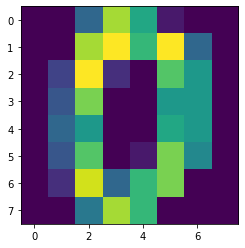

This is supposed to be a '1':


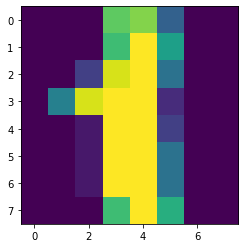

This is supposed to be a '2':


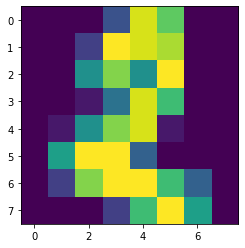

This is supposed to be a '3':


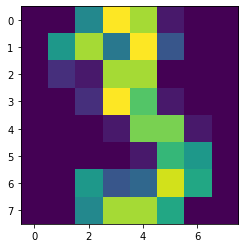

This is supposed to be a '4':


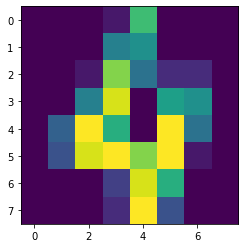

This is supposed to be a '5':


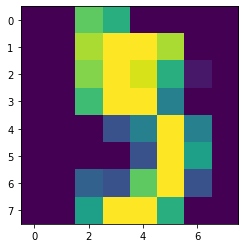

This is supposed to be a '6':


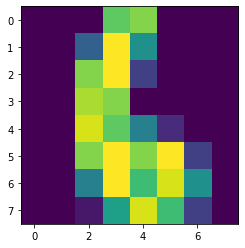

This is supposed to be a '7':


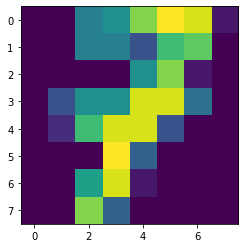

In [25]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print(X.shape, Y.shape,'\n')

# Let's look a a few examples
for i in range(8):  # show 8 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

In [26]:
digits_cov = np.cov(X.T)
print("digits_cov.shape = ",digits_cov.shape)
lambdas, vs = sorted_eig(np.array(digits_cov)) 
print(vs)

W = vs[:,0:2] # Just keep two dimensions
proj_digits = X @ W
print("proj_digits.shape= ", proj_digits.shape)

# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

digits_cov.shape =  (64, 64)
[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.01730947  0.01010646 -0.01834207 ...  0.          0.
   0.        ]
 [ 0.22342883  0.04908492 -0.12647554 ...  0.          0.
   0.        ]
 ...
 [ 0.08941847 -0.17669712 -0.23208416 ...  0.          0.
   0.        ]
 [ 0.03659771 -0.01945471 -0.16702656 ...  0.          0.
   0.        ]
 [ 0.0114685   0.00669694 -0.03480438 ...  0.          0.
   0.        ]]
proj_digits.shape=  (1797, 2)


In [27]:
W = vs[:,0:3]  # just three dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot, separate them by "z" which is the digit of interest.  
fig = go.Figure(data=[go.Scatter3d(x=proj_digits[:,0], y=proj_digits[:,1], z=proj_digits[:,2],
                mode='markers', marker=dict(size=4, opacity=0.8, color=Y, showscale=True), 
                text=['digit='+str(j) for j in Y] )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

proj_digits.shape =  (1797, 3)


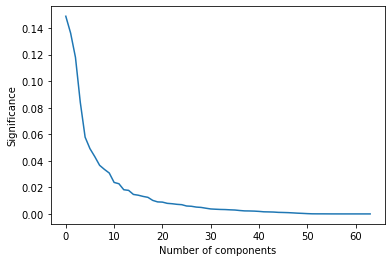

In [28]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance') 
plt.show()